Zomato Dataset Exploratory Data Analysis

In Data Analysis what all things we do 

1.Missing values 
2.Explore about the numerical variables. 
3.Explore about categorical variables. 
4.finding relationship between features. 


In [1]:
# Import libraries 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 


pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None) 


In [2]:
data_import =  pd.read_csv('zomato.csv' , encoding='latin-1')

data_import.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data_import.columns 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Check Missing values. 

In [5]:
def missing_vals(df): 
    for i in df :
        if df[i].isnull().sum() > 0 : 
            print(f"{i} : {df[i].isnull().sum()} missing values out of {len(df[i])}")
    else : 
        print("No missing columns.")
missing_vals(data_import) 

Cuisines : 9 missing values out of 9551
No missing columns.


Cuisine Column has 9 missing values out of 9551 rows .

In [6]:
def duplicated_func(df) : 
    
    print(f"Total number of duplicated rows in data are: {df.duplicated().sum()}") 


duplicated_func(data_import)

Total number of duplicated rows in data are: 0


There are no duplicated rows in this dataset.

In [7]:
data_import.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
country_code_df = pd.read_excel('Country-Code.xlsx')
country_code_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [9]:
country_code_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [10]:
country_code_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Join 'data_import' and 'country_code_df' using pd.merge()

In [11]:

final_df = pd.merge(data_import , country_code_df , how = 'left' , on = 'Country Code')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [13]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [14]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Maximum number of transactions are happening in India. 

([<matplotlib.patches.Wedge at 0x1e450720eb0>,
 [Text(-1.07479320772197, 0.23413577393196094, 'India'),
  Text(1.056503577535216, -0.3062681678779072, 'United States'),
  Text(1.093560093908513, -0.118854200644337, 'United Kingdom'),
  Text(1.0979610170116392, -0.06694479160298568, 'Brazil'),
  Text(1.0997733864424146, -0.022327079365287286, 'UAE')],
 [Text(-0.5862508405756199, 0.12771042214470596, '93.17%'),
  Text(0.5762746786555722, -0.1670553642970403, '4.67%'),
  Text(0.596487323950098, -0.06482956398782018, '0.86%'),
  Text(0.598887827460894, -0.03651534087435582, '0.65%'),
  Text(0.5998763926049533, -0.012178406926520337, '0.65%')])

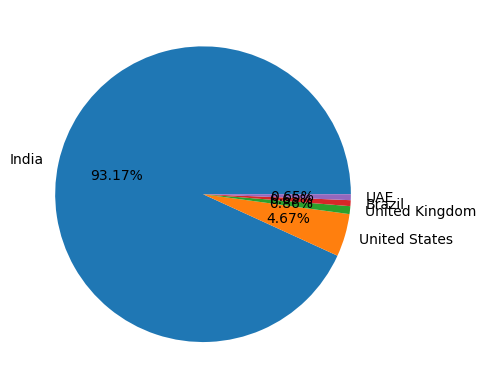

In [15]:
# Top five countries using zomato . 

country_names = final_df.Country.value_counts().index[:5]
no_of_records = final_df.Country.value_counts().values[:5]


plt.pie(no_of_records , labels = country_names , autopct = '%1.2f%%')

observation : 93.17 % of customers of zomato are from India , 4.67 % of customers are from USA and so on. 

In [16]:
ratings = final_df.groupby(['Aggregate rating' , 'Rating color' , 'Rating text']).size().reset_index().rename(columns = {0: 'Rating Count'})

Obseravation : 
1. When rating is between 4.9 to 4.5 -> Excellent
2. When rating is between 4.4 to 4.0 -> Very good 
3. When rating is between 3.9 to 3.5 -> good 
4. When rating is between 3.4 to 2.5 -> Average 
5. When rating is between 2.4 to 1.8 -> Poor 
6. When rating is 0 -> Not rated. 


c:\Users\ASUS\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


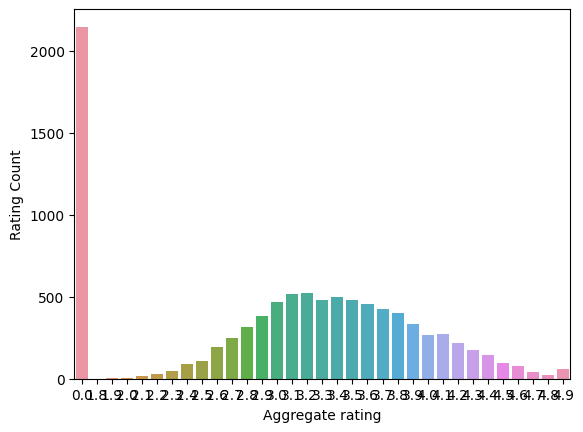

In [17]:
sns.barplot('Aggregate rating' , 'Rating Count' , data = ratings)
plt.rcParams['figure.figsize'] = (12,10)

Used 'Rating color' column from ratings as hue . 

c:\Users\ASUS\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

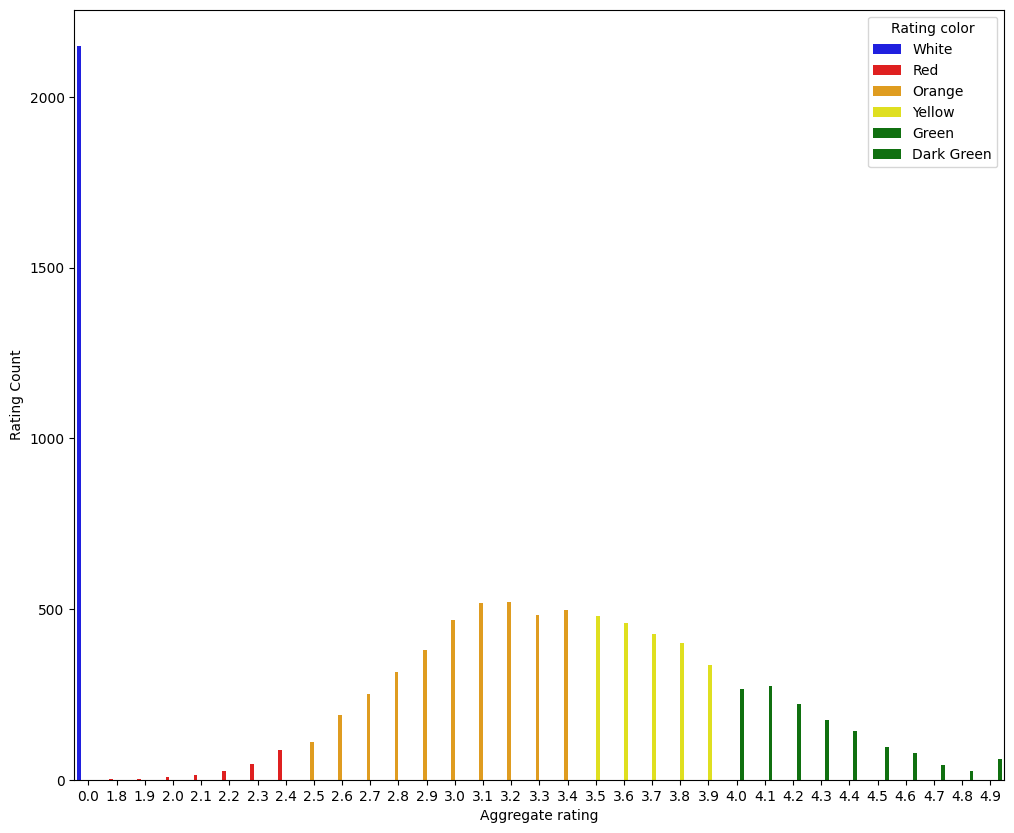

In [18]:
sns.barplot('Aggregate rating' , 'Rating Count' ,hue = 'Rating color' ,  data = ratings , palette= ['blue' , 'red' , 'orange' , 'yellow' , 'green' , 'green'])


Observation : 
NOTE : Made white as blue because white was't visible.<br>
1.Not rated count is very high <br>
2.Maximum no of ratings are between 2.5 to 3.4 

c:\Users\ASUS\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating color', ylabel='count'>

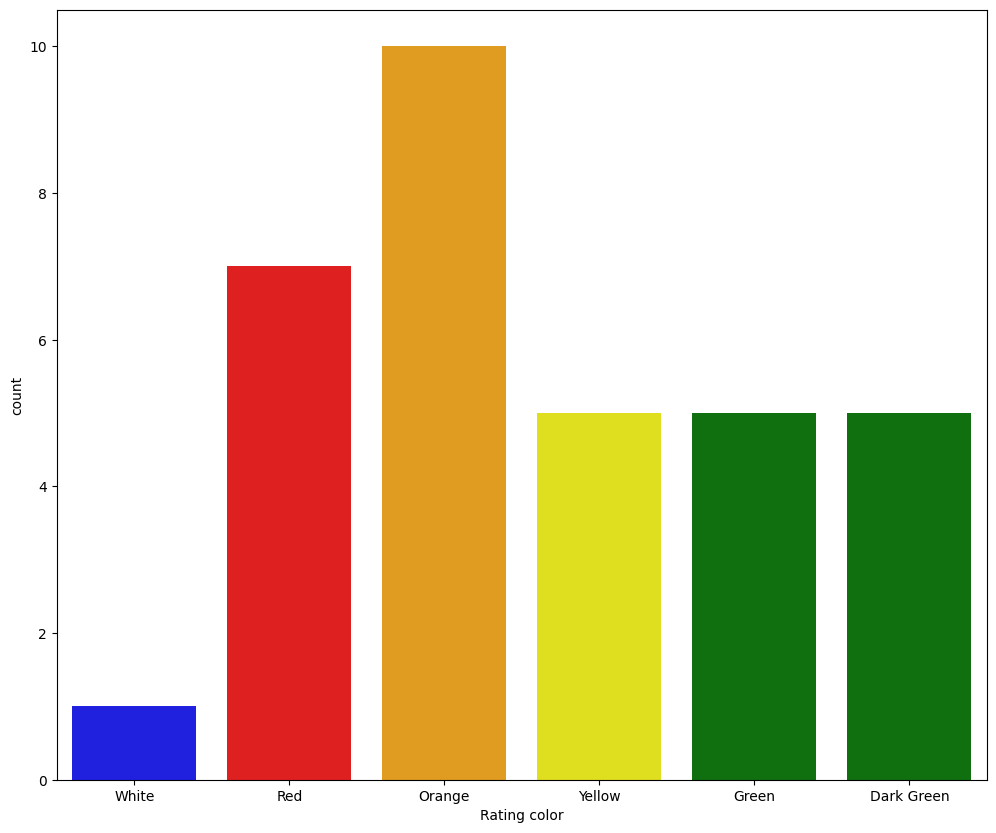

In [19]:
# Count plot 


sns.countplot( 'Rating color',  data = ratings , palette= ['blue' , 'red' , 'orange' , 'yellow' , 'green' , 'green'])

Observation : 
1. Frequency of Orange color rated is higher.

In [20]:
## Find the countries name that has given 0 rating 


final_df[final_df['Aggregate rating'] == 0.0].groupby('Country').size().reset_index().rename(columns = {0 : 'Zero Count '})

,Country,Zero Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Observation : 
1. Maximum number of 0 rating are from Indian Customers. 

In [21]:
## Find out which currency is used by which country ? 

final_df[['Currency','Country']].groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [22]:
### Which countries do have online deliveries option ? 

final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observation : 

1.Only India and UAE has online delivery option. <br>
2.In India some of the regions only deliveries will not be there . <br>

([<matplotlib.patches.Wedge at 0x1e452528fa0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

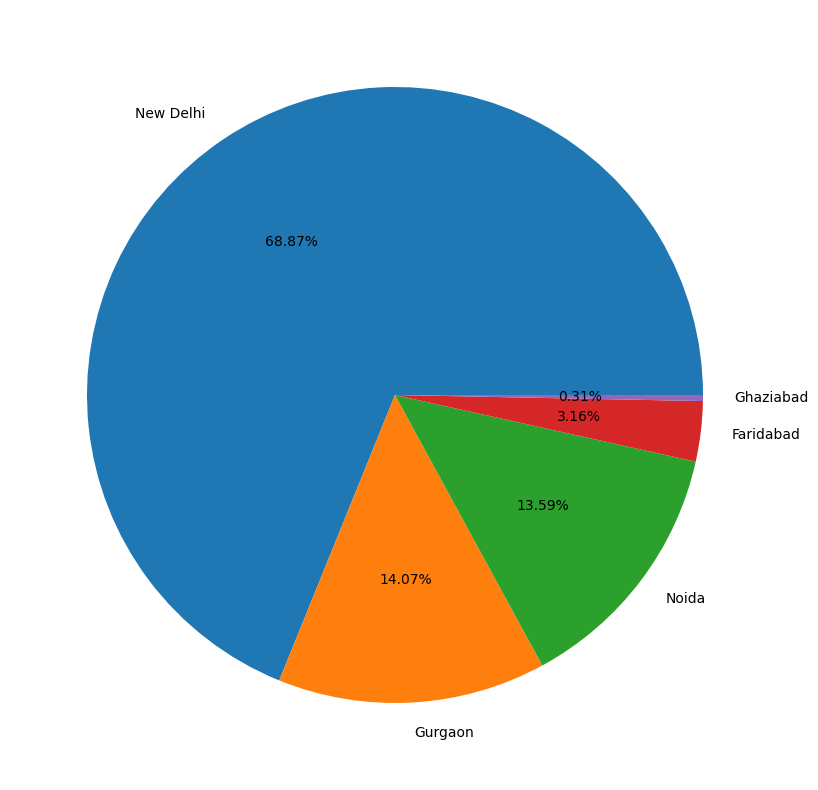

In [23]:
## Top 5 cities distribution Pie chart 


cities_name = final_df['City'].value_counts().index[:5]
cities_count = final_df['City'].value_counts().values[:5]


plt.pie(cities_count , labels = cities_name , autopct = '%1.2f%%')

Observation 


1. New Delhi has maximum number of transaction followed by Gurgoan followed by Noida and so on .

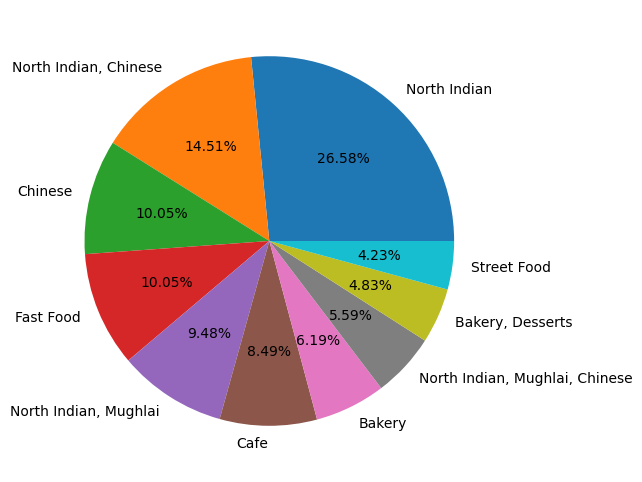

In [25]:
## Top 10 Cuisines 


cuisines_names = final_df['Cuisines'].value_counts().index[:10]
cuisines_count = final_df['Cuisines'].value_counts().values[:10]


plt.pie(cuisines_count , labels = cuisines_names , autopct = '%1.2f%%')
plt.rcParams['figure.figsize'] = (10,6)

Observation : 

1.In India , North Indian food is ordered most. <br>
2.Followed by North Indian , Chinese .  <br>
3.Followed by Chinese and fast foods and etc . <br>